In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Data preprocessing

In [56]:
#import the dataset
df=pd.read_csv("customer_churn_large_dataset.csv")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [57]:
#print concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [58]:
#check for missing values
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [59]:
#check for duplicate records
df[df.duplicated()].shape[0]

0

In [60]:
#check datatype
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [61]:
df.Gender.replace(['Male','Female'],[0,1],inplace = True)
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,0,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,1,New York,1,48.76,172,0
2,3,Customer_3,24,1,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,1,Miami,3,97.94,297,1
4,5,Customer_5,46,1,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,0,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,1,New York,19,61.65,351,0
99997,99998,Customer_99998,64,0,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,1,New York,20,49.25,434,1


In [62]:
#since customerId is not required for prediction so drop it
drop_data = df.drop(["CustomerID","Name"],axis = 1 ,inplace = True)

In [63]:
#print last 5 records of the  dataset
df.tail(5)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,33,0,Houston,23,55.13,226,1
99996,62,1,New York,19,61.65,351,0
99997,64,0,Chicago,17,96.11,251,1
99998,51,1,New York,20,49.25,434,1
99999,27,1,Los Angeles,19,76.57,173,1


# Exploratory Data Analysis

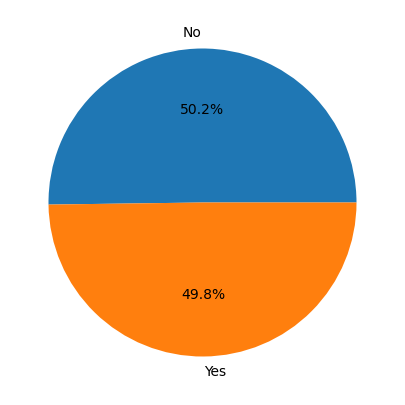

In [64]:
#pie chart to count senior citizen
plt.figure(figsize=(10,5))
plt.pie(df["Gender"].value_counts(),autopct="%.1f%%",labels=["No","Yes"])
plt.show()

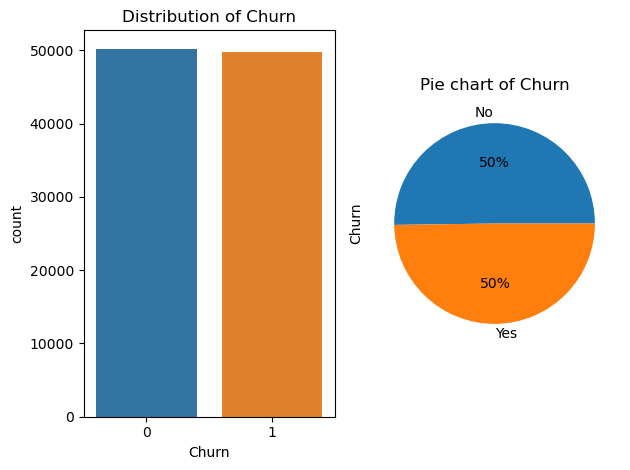

In [65]:
#check the distibution of churn class
plt.subplot(121)
sns.countplot(data=df,x="Churn")
plt.title("Distribution of Churn")
plt.subplot(122)
df['Churn'].value_counts().plot(kind='pie',autopct="%1.f%%",labels=['No','Yes'])
plt.title('Pie chart of Churn')
plt.tight_layout()
plt.show()

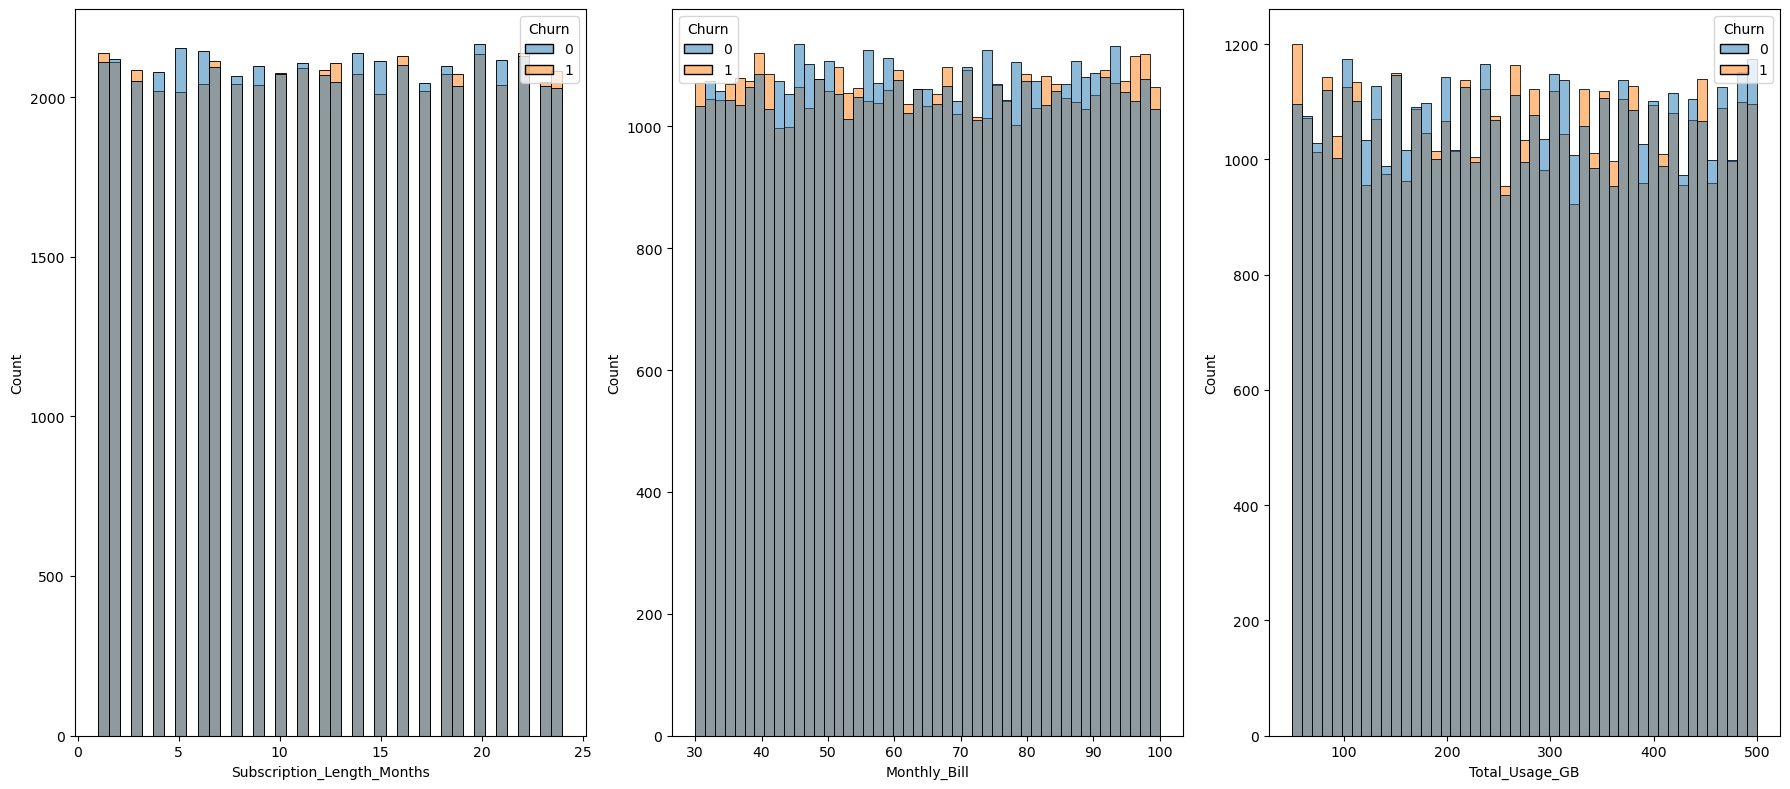

In [66]:
#plot numerical features with histogram
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(18,8))
axes=axs.flatten()
num_columns=['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
for i,col in enumerate(num_columns):
 if(col!='Location'):
  sns.histplot(x=col,data=df,hue='Churn',ax=axes[i])
fig.tight_layout()
plt.show()

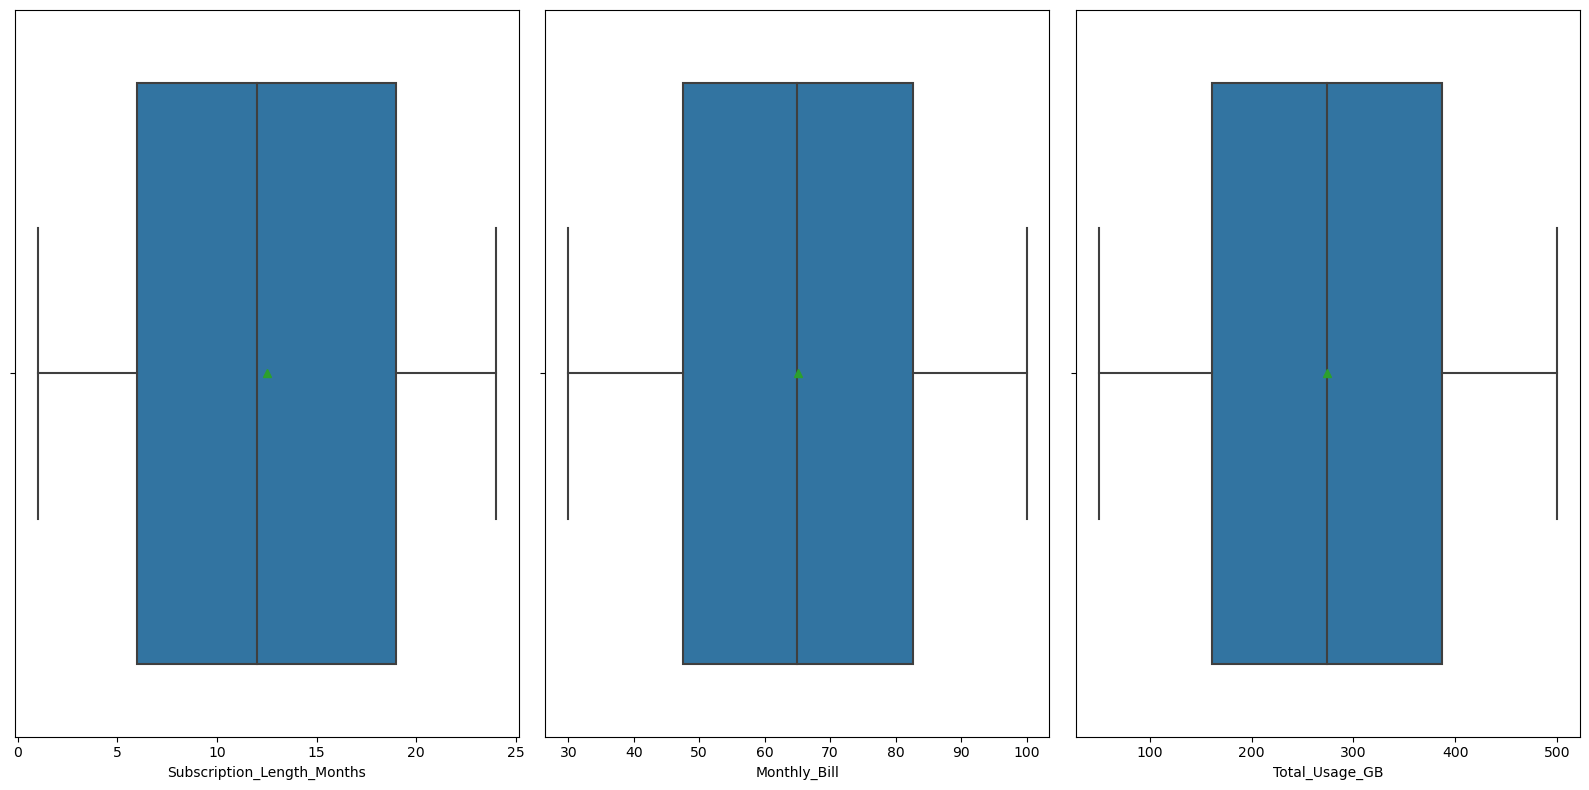

In [67]:
#plot numerical features with boxplot
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(16,8))
axes=axs.flatten()
num_columns=['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
for i,col in enumerate(num_columns):
    if(col!='Location'):
      sns.boxplot(x=col,data=df,showmeans=True,ax=axes[i])
fig.tight_layout()
plt.show()

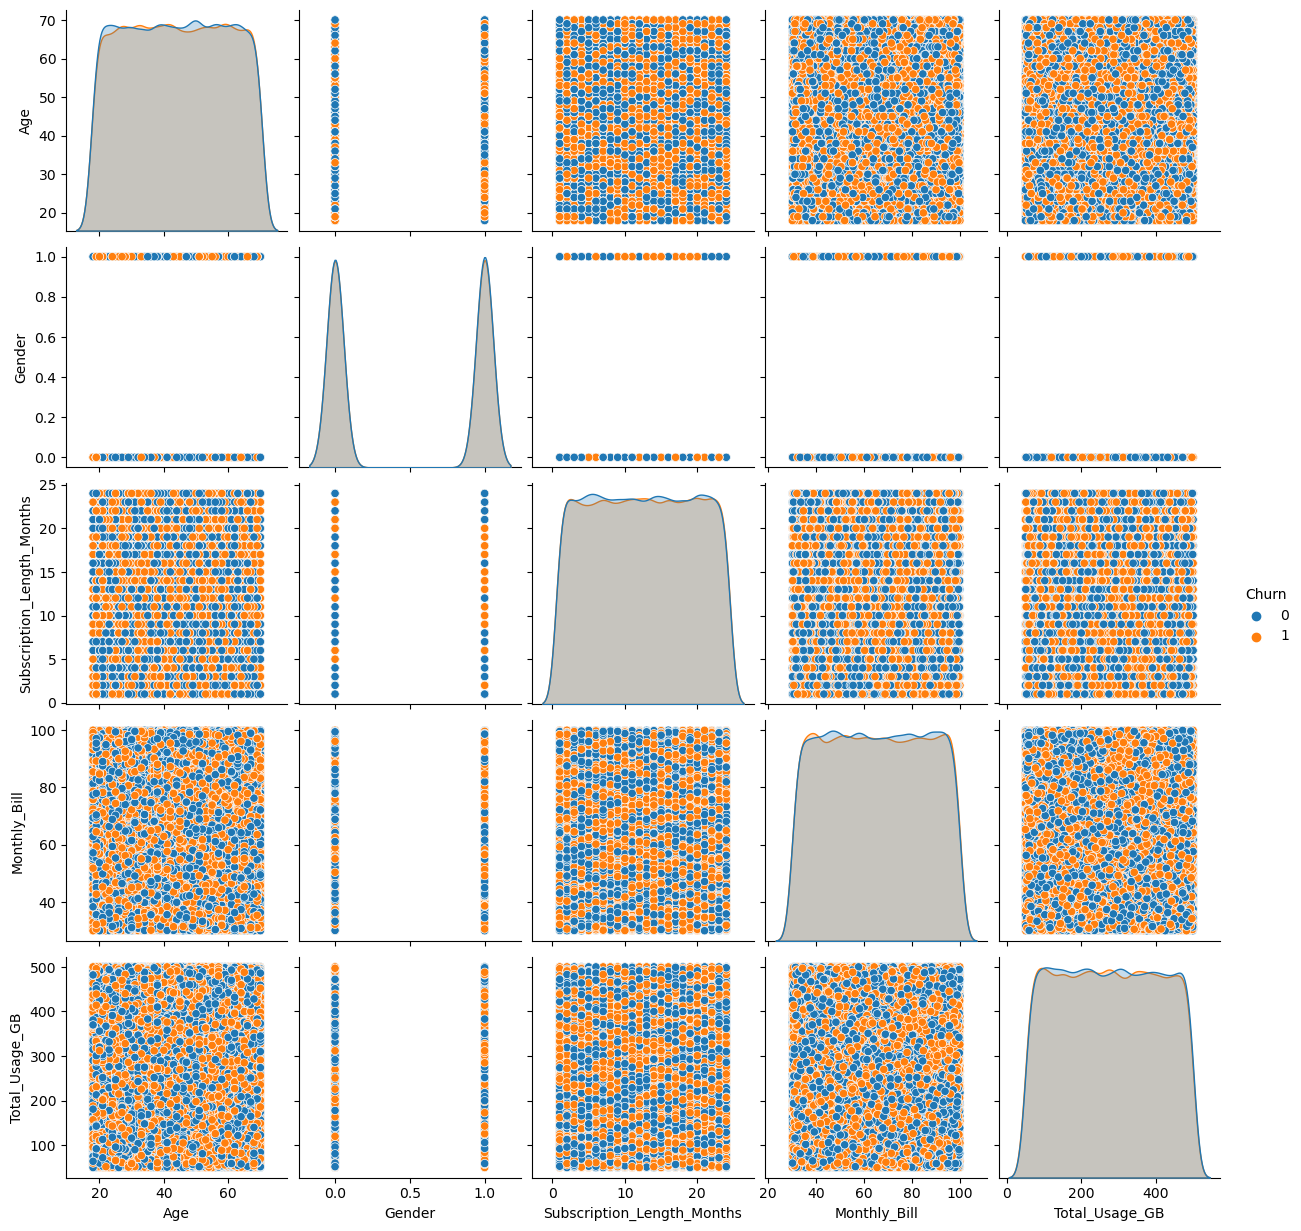

In [68]:
sns.pairplot(df.drop(columns="Location"),hue="Churn",kind="scatter")
plt.show()

C:\Users\Sani\AppData\Local\Temp\ipykernel_26672\3081274477.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")


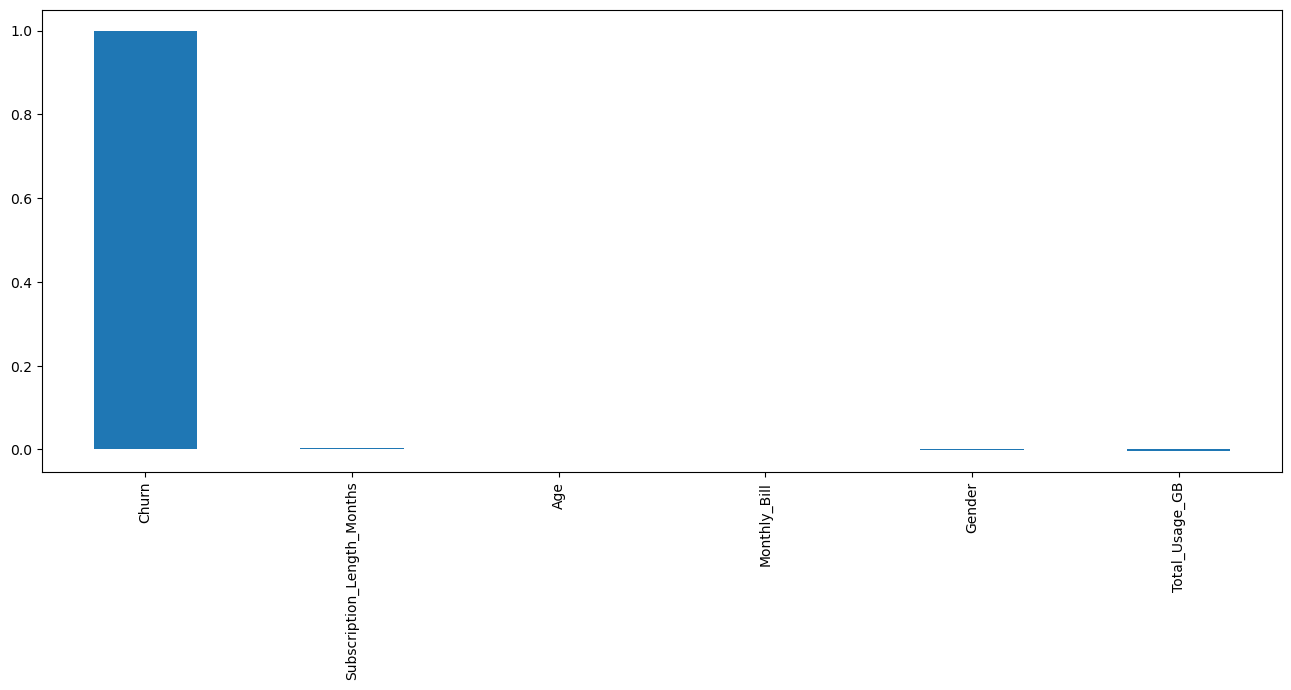

In [69]:
#get correlation of churn with other variables
plt.figure(figsize=(16,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.show()

C:\Users\Sani\AppData\Local\Temp\ipykernel_26672\3188801619.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="rainbow")


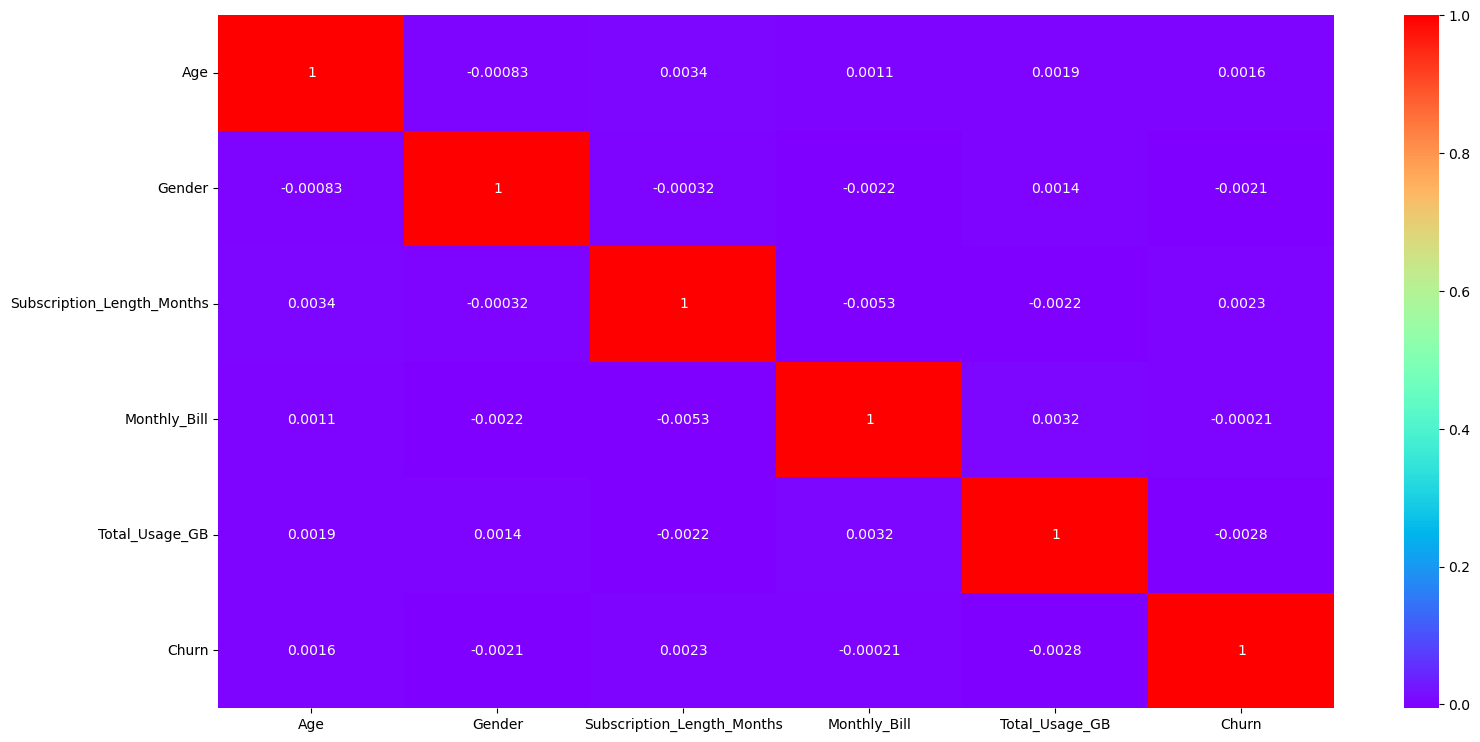

In [70]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot=True,cmap="rainbow")
plt.show()

In [78]:
#seperating independent variables and target variable
x=df.drop(columns=['Churn','Location'],axis=1)
y=df["Churn"]

In [79]:
x.shape

(100000, 5)

In [80]:
#encoding categorical values into numeric using label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for feature in df.select_dtypes(include='object').columns:
 df[feature]=encoder.fit_transform(df[feature])

# Feature Selection

In [81]:
from sklearn.feature_selection import SelectKBest

In [82]:
select_feature=SelectKBest(k=3) #no of features to be select
select_feature.fit(x,y)

SelectKBest(k=3)

In [83]:
#Top 10 high correlated features
select_feature.get_feature_names_out()

array(['Gender', 'Subscription_Length_Months', 'Total_Usage_GB'],
      dtype=object)

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [89]:
from sklearn.preprocessing import MinMaxScaler
num_cols=['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']
scaler=MinMaxScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.fit_transform(x_test[num_cols])

In [90]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_pred,y_test)

0.4991

In [100]:
from sklearn.ensemble import RandomForestClassifier
rand_forest=RandomForestClassifier()
rand_forest.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_pred,y_test)

0.4991

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
#GradientBoostingClassifier without balancing dataset and without hyper paramter 
gbc_model=GradientBoostingClassifier( )
gbc_model.fit(x_train,y_train)
prediction=model.predict(x_test)
accuracy_score(prediction,y_test)

0.4991

In [117]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [118]:
accuracy_score(y_test,prediction)

0.4991

In [120]:
precision_score(y_test,prediction)

0.49646308657965527

In [121]:
recall_score(y_test,prediction)

0.5009550618276868

In [122]:
f1_score(y_test,prediction)

0.4986989591673338

In [123]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.50      0.50      0.50     10053\n           1       0.50      0.50      0.50      9947\n\n    accuracy                           0.50     20000\n   macro avg       0.50      0.50      0.50     20000\nweighted avg       0.50      0.50      0.50     20000\n'